In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
import itertools
from sklearn.metrics import precision_recall_curve

In [4]:
file_path = r"C:\Users\dekis\OneDrive\Desktop\DATA SCIENCE\FINAL PROJECT\ds-final-project-main\ds-final-project-main\twitter_racism_parsed_dataset.csv"

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

data

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0
...,...,...,...,...,...
13466,5.755964e+17,5.755964e+17,#mkr NOOOOO!!! I wanted Kat and Andre to lose!!!,none,0
13467,5.580631e+17,5.580631e+17,RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane ...,none,0
13468,5.755969e+17,5.755969e+17,Glad the proper competition is starting and ev...,none,0
13469,5.755990e+17,5.755990e+17,"No worries Pete and Manu, take all the time of...",none,0


In [5]:
#the link to the dataset
print("Dataset URL: https://huggingface.co/datasets/sakren/twitter_racism_dataset")
# the shape of the dataset
print("Dataset shape:", data.shape)
# head of the dataset 
print("First few rows of the dataset:")
print(data.head())
#summary stats

print(data.describe(include='all'))
# Display info abt dataset:
data.info()

Dataset URL: https://huggingface.co/datasets/sakren/twitter_racism_dataset
Dataset shape: (13471, 5)
First few rows of the dataset:
          index            id  \
0  5.767493e+17  5.767493e+17   
1  5.408905e+17  5.408905e+17   
2  5.678433e+17  5.678433e+17   
3  5.766462e+17  5.766462e+17   
4  5.713492e+17  5.713492e+17   

                                                Text Annotation  oh_label  
0  @AAlwuhaib1977 Muslim mob violence against Hin...     racism         1  
1             @Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG       none         0  
2  @jncatron @isra_jourisra @AMPalestine Islamoph...     racism         1  
3  Finally I'm all caught up, and that sudden dea...       none         0  
4             @carolinesinders @herecomesfran *hugs*       none         0  
               index            id  \
count   1.347100e+04  1.347100e+04   
unique           NaN           NaN   
top              NaN           NaN   
freq             NaN           NaN   
mean    5.645450e+17  5

## Brief summary of the dataset:¶

The dataset is sourced from Hugging Face "Twitter Racism Dataset," it contains 13,471 tweets, each annotated to indicate whether it includes racist content. Key features of the dataset include a unique tweet ID, the tweet text, and a binary label (oh_label), where '1' indicates racist content and '0' indicates none. This dataset is particularly suited to detect and analyze racist language on social media.

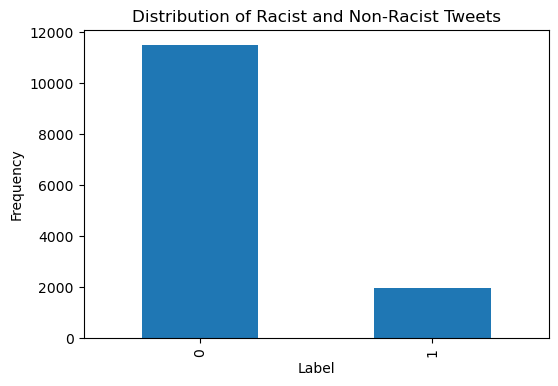

In [6]:
# Visualize Data Distributions
plt.figure(figsize=(6,4))
data['oh_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Racist and Non-Racist Tweets')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

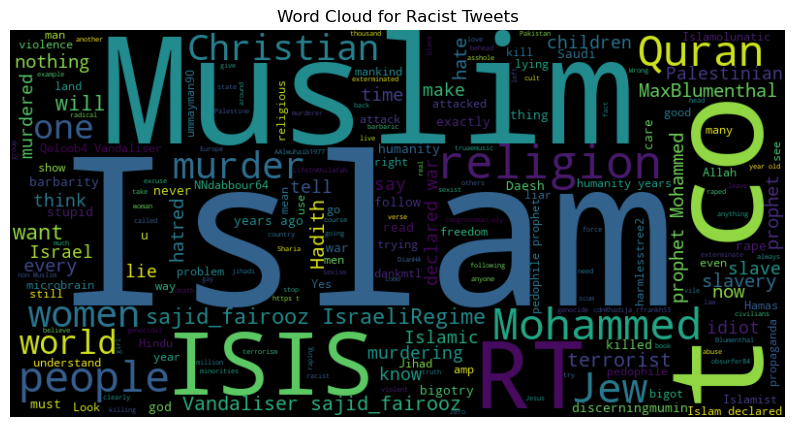

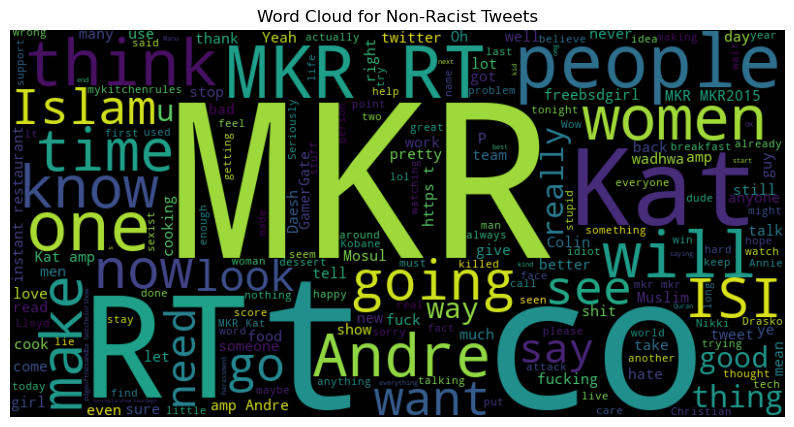

In [7]:
# Generate word clouds for the most frequent words in racist and non-racist tweets

# Subset the data for racist tweets
racist_tweets = data[data['oh_label'] == 1]['Text']
# Subset the data for non-racist tweets
non_racist_tweets = data[data['oh_label'] == 0]['Text']

# word cloud for racist tweets
wordcloud = WordCloud(width=800, height=400).generate(' '.join(racist_tweets))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Racist Tweets')
plt.show()

# word cloud for non-racist tweets
wordcloud = WordCloud(width=800, height=400).generate(' '.join(non_racist_tweets))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Racist Tweets')
plt.show()

## Baseline Model with Logistic Regression

In [8]:
# Data cleaning function
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove non-letters
    text = text.lower().strip()
    return text

# Clean the text data / Apply the text cleaning function to the 'Text' column
data['Text'] = data['Text'].apply(clean_text)

In [9]:
# Prepare the data for modeling
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Text'])
y = data['oh_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9098330241187385
Precision: 0.7962264150943397
Recall: 0.5275
F1 Score: 0.6345864661654136


Conclusion on the basline model: the recall is relatively low,which means that the model may miss a significant portion of racist tweets, i will need to reduce false negatives

## Optimization and Model Comparison

In [10]:
# Define function for grid search to optimize models
def grid_search(model, params):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Best parameters: {grid.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    return best_model

In [11]:
#1
# Logistic Regression Optimization
params_lr = {'C': [0.1, 1, 10]}
model_lr = LogisticRegression()
best_lr = grid_search(model_lr, params_lr)

Best parameters: {'C': 10}
Accuracy: 0.9191094619666048
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2295
           1       0.78      0.63      0.70       400

    accuracy                           0.92      2695
   macro avg       0.86      0.80      0.83      2695
weighted avg       0.91      0.92      0.92      2695



In [12]:
#2
# Random Forest Optimization
params_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
model_rf = RandomForestClassifier()
best_rf = grid_search(model_rf, params_rf)

Best parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.8560296846011132
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2295
           1       1.00      0.03      0.06       400

    accuracy                           0.86      2695
   macro avg       0.93      0.52      0.49      2695
weighted avg       0.88      0.86      0.79      2695



In [14]:
#3
# SVM Optimization
params_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
model_svc = SVC(probability=True)
best_svc = grid_search(model_svc, params_svc)

Best parameters: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.9235621521335807
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2295
           1       0.76      0.71      0.73       400

    accuracy                           0.92      2695
   macro avg       0.86      0.83      0.84      2695
weighted avg       0.92      0.92      0.92      2695



CONCLUSIONS:

Logistic Regression showed a good balance of precision and recall, achieving an accuracy of about 91.91%, with solid performance across both classes, but slightly lower performance for the minority class.

Random Forest demonstrated high precision for the majority class but extremely poor recall for the minority class (racist tweets), indicating it mostly predicted the majority class. This resulted in a lower overall accuracy of 85.53% and an imbalanced classification performance.

SVM provided the best overall metrics, with an accuracy of about 92.36%, and balanced precision and recall between the two classes.

The SVM Optimization is the best choice in the sake of my project 

## SVM OPTIMIZATION

In [15]:
# CONVERT TEXT DATA INTO A FORMAT SUITABLE FOR SVM: (TEXT TO VECTOR OF NUMBERS)
# Prepare the data for modeling
# TF-IDF vectorization of the text with bi-grams and limit of 10000 features
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(data['Text'])
y = data['oh_label']


# Splitting the dataset into training and testing sets with 20% data as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Stacking classifier setup
# Define estimators for stacking

estimators = [
    ('lr', LogisticRegression()),# Logistic Regression as a base estimator
    ('dt', DecisionTreeClassifier(max_depth=3)) # Decision Tree with a depth of 3 as a base estimator
]

# Setup Stacking Classifier with SVM as the final estimator
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC(kernel='linear', class_weight='balanced', probability=True)
)

# Fit the stacked model on the training data
clf.fit(X_train, y_train)


# # Predict and evaluate the stacked model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9120593692022263
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2295
           1       0.65      0.87      0.75       400

    accuracy                           0.91      2695
   macro avg       0.81      0.89      0.85      2695
weighted avg       0.93      0.91      0.92      2695



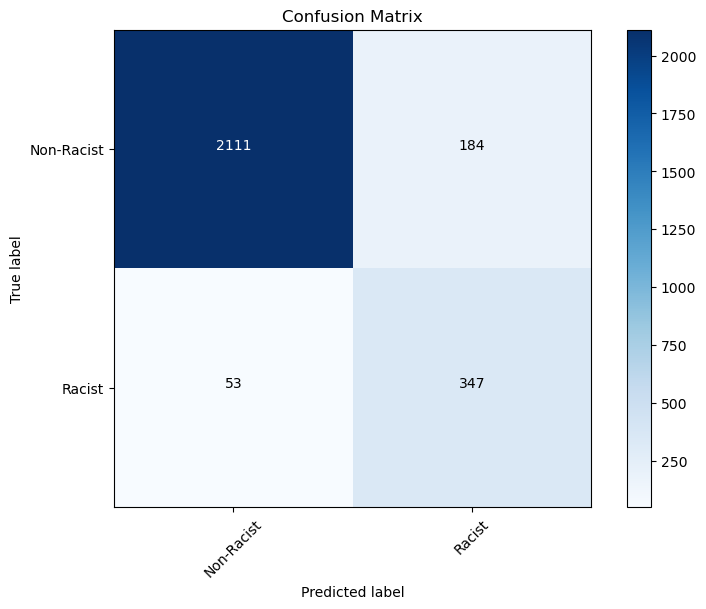

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Racist', 'Racist'], rotation=45)
plt.yticks(tick_marks, ['Non-Racist', 'Racist'])
# show numbers: loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

INTERPRETATION:
    
The model has a high accuracy of 91.21% indicating a strong overall performance. 
Precision for the racist class is relatively low at 65%, reflecting a higher number of false positives for this category. 
However, the recall for the racist class is high at 87%, meaning the model is good at identifying most racist tweets.
The F1 score for the racist class is 75%, balancing precision and recall, which shows the model is effective but could improve in distinguishing racist tweets more precisely to reduce false positives.

In [19]:
import pickle
# Define file paths for saving the model and vectorizer
model_path = r"C:\Users\dekis\OneDrive\Desktop\DATA SCIENCE\FINAL PROJECT\ds-final-project-main\ds-final-project-main\model.pkl"
vectorizer_path = r"C:\Users\dekis\OneDrive\Desktop\DATA SCIENCE\FINAL PROJECT\ds-final-project-main\ds-final-project-main\vectorizer.pkl"

# Save the model
with open(model_path, 'wb') as model_file:
    pickle.dump(clf, model_file)

# Save the vectorizer
with open(vectorizer_path, 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully.")



Model and vectorizer saved successfully.
